In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os, sys, math
from time import time
from numpy import linalg as LA
import math
from numpy.fft import fft2, ifft2, fftshift, ifftshift

(479, 500)


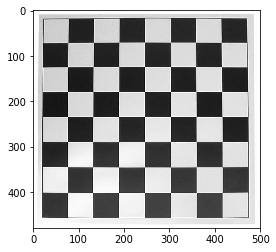

In [2]:
imgName = "chess.jpg"
imgRgb = cv2.imread(imgName)
img = cv2.cvtColor(imgRgb, cv2.COLOR_BGR2GRAY)/255

plt.imshow(img, cmap="gray")
print(img.shape)

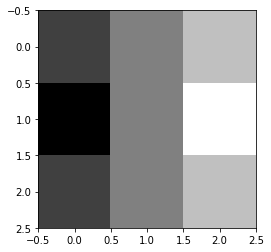

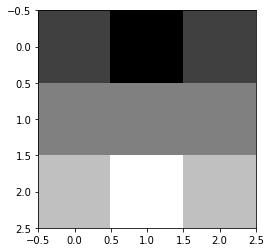

In [3]:
sobelX = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobelY = np.transpose(sobelX)

plt.imshow(sobelX, cmap="gray")
plt.figure()
plt.imshow(sobelY, cmap="gray")

In [4]:
def convolveSobel(conv_img, filterType, w = 3):
    n, m = conv_img.shape
    conv_img = np.pad(conv_img,(int(w/2),int(w/2)),mode='constant')
    temp1=[]
    for i in range(n):
        temp=[]
        for j in range(m):
            k = conv_img[i:i+w, j:j+w]
            val = np.multiply(k, filterType)
            temp.append(np.sum(val))
        temp1.append(temp)
    
    return np.array(temp1)

In [5]:
def gaussianFilter(img, sigma):
    numRows, numCols = img.shape

    centerX = int(numRows/2)
    centerY = int(numCols/2)

    filter = np.array([[math.exp(-((i - centerX)**2 + (j - centerY)**2) / (2 * sigma**2)) for j in range(numCols)] for i in range(numRows)])
    
    #cv2.imwrite("output/"+name+".bmp", filter*255.0)
    #plt.imshow(filter, cmap="gray")
    shiftedDFT = fftshift(fft2(img))
    filteredDFT = shiftedDFT*filter
    return np.real(ifft2(ifftshift(filteredDFT)))

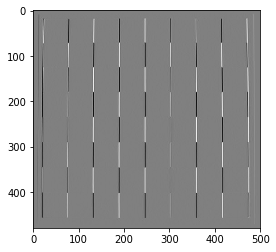

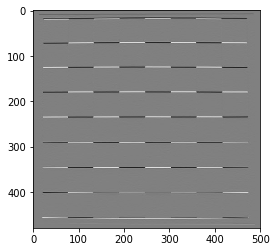

In [6]:
w = 3
Gx = convolveSobel(img, sobelX)
Gy = convolveSobel(img, sobelY)

Ixx=Gx**2
Iyy=Gy**2
Ixy=Gx*Gy

#Ixx = gaussianFilter(Ixx, 3);
#Iyy = gaussianFilter(Iyy, 3);
#Ixy = gaussianFilter(Ixy, 3);

plt.imshow(Gx, cmap="gray")
plt.figure()
plt.imshow(Gy, cmap="gray")

In [7]:
H = np.zeros((2,2))
corner_img = imgRgb.copy()
n, m, _ = corner_img.shape
corners = np.zeros((n,m))
wlen = int(w/2)
thr = 15#2000000000
lambd = 0.04
for y in range(wlen, n-wlen):
    for x in range(wlen, m-wlen):
        Sxx=np.sum(Ixx[y-wlen:y+1+wlen, x-wlen:x+1+wlen])
        Syy=np.sum(Iyy[y-wlen:y+1+wlen, x-wlen:x+1+wlen])
        Sxy=np.sum(Ixy[y-wlen:y+1+wlen, x-wlen:x+1+wlen])
        
        det = (Sxx * Syy) - (Sxy**2)
        trace = Sxx + Syy
        r = det - lambd*(trace**2)
        #print(r)
        if r > thr:
            corners[y, x] = r
            #print(r)
            #cv2.circle(corner_img,(x,y),1,255,-1)
            #corners.append((x,y,min_eigen_value))

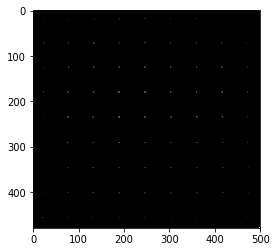

In [8]:
plt.imshow(corners, cmap="gray")

In [11]:
#plt.imshow(corners, cmap="gray")
"""corner_img = imgRgb.copy()
stride = 5
#cornersNew = np.zeros(corners.shape)
for y in range(wlen, n-wlen, stride):
    for x in range(wlen, m-wlen, stride):
        arr = np.array(corners[y:y+stride, x:x+stride])
        #print(arr, np.amax(arr))
        #print(arr)
        if(np.amax(arr) != 0):
            m_at = np.where(arr == np.amax(arr))
            #print(m_at)
            #cornersNew[y, x] = corners[y+m_at[0], x+m_at[1]]
            cv2.circle(corner_img,(x+m_at[1],y+m_at[0]),1,255,0)"""
#plt.imshow(corners, cmap="gray")
corner_img = imgRgb.copy()
stride = 5
wlen = int(stride/2)
cornersNew = np.zeros(corners.shape)
for y in range(wlen, n-wlen):
    for x in range(wlen, m-wlen):
        arr = np.array(corners[y:y+stride, x:x+stride])
        #print(arr, np.amax(arr))
        #print(arr)
        if(np.amax(arr) != 0):
            m_at = np.where(arr == np.amax(arr))
            if(m_at[0] == int(stride/2) and m_at[1] == int(stride/2)):
                cornersNew[y, x] = corners[y+m_at[0], x+m_at[1]]
                cv2.circle(corner_img,(x+m_at[1],y+m_at[0]),2,255,-1)

True

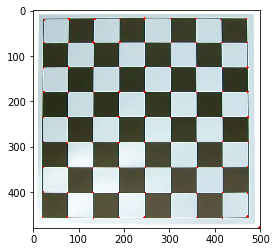

In [12]:
plt.imshow(corner_img, cmap="gray")
cv2.imwrite("out_harris.jpg", corner_img)